In [1]:
# Copyright (c) Meta Platforms, Inc. and affiliates.
# Lightly adapted from https://github.com/facebookresearch/segment-anything/blob/main/notebooks/automatic_mask_generator_example.ipynb

# Automatically generating object masks with SAM

## Set-up

In [2]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

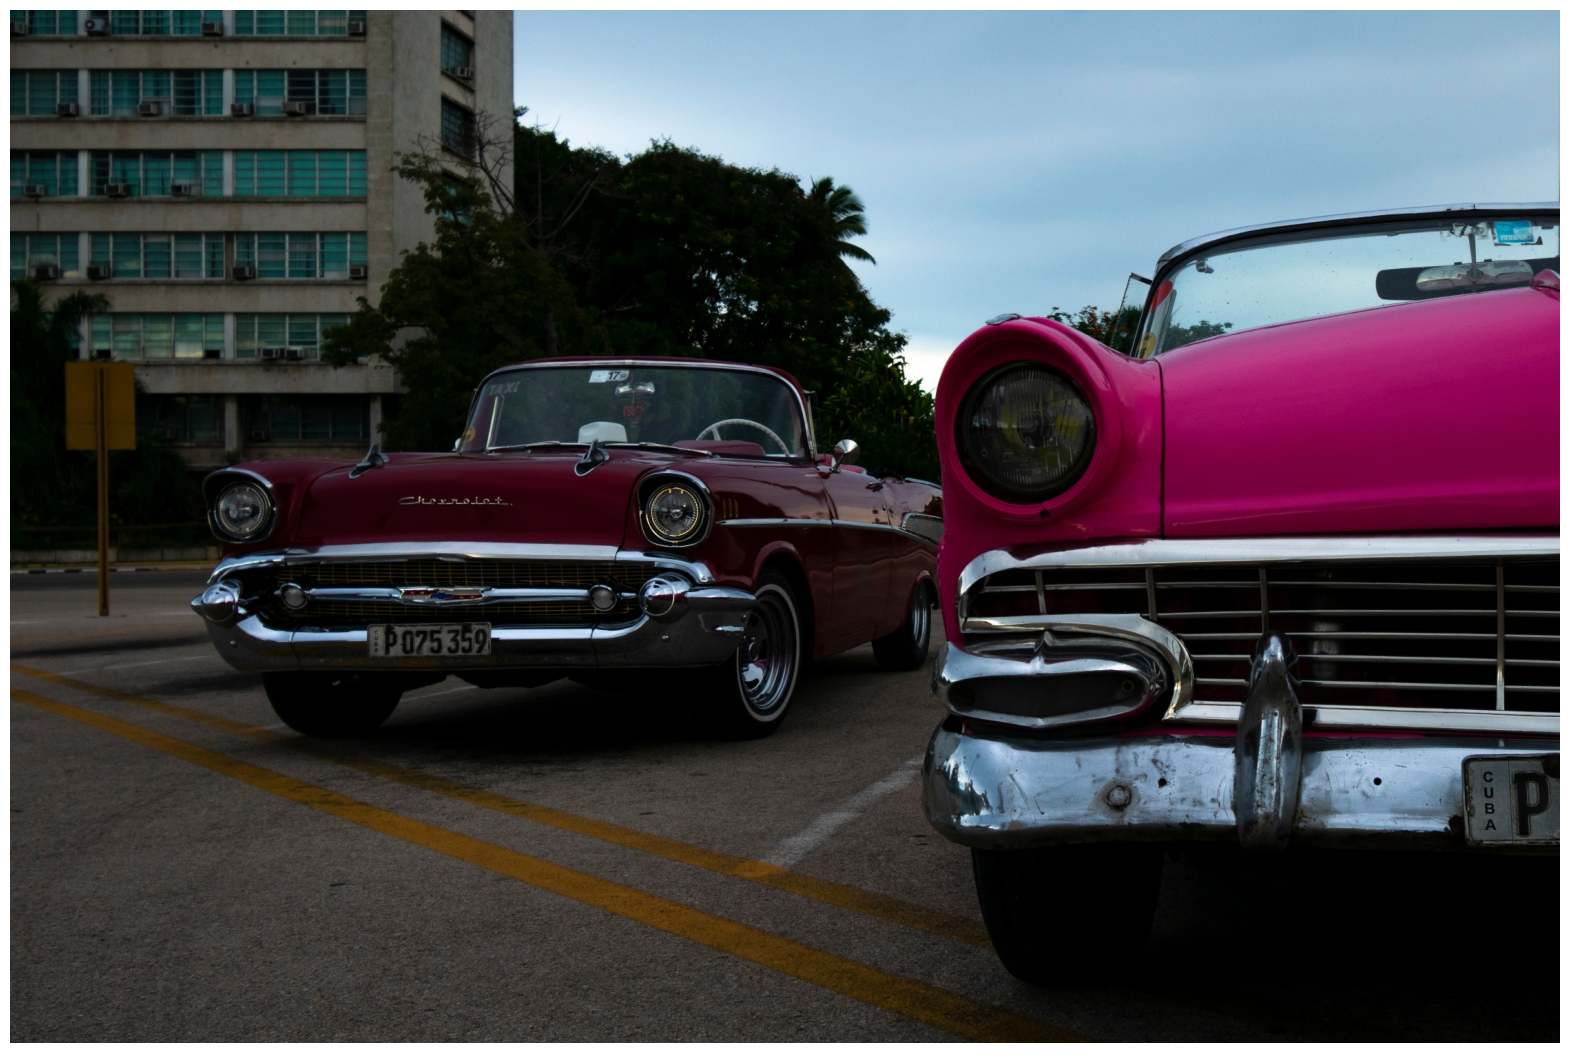

In [3]:
np.random.seed(3)

def show_anns(anns, borders=True):
    if len(anns) == 0:
        return
    # 按照每个掩码的面积（area）从大到小排序，保证大的掩码先绘制，避免被小的掩码遮盖
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)

    ax = plt.gca()
    ax.set_autoscale_on(False)

    # 创建一个全透明的 RGBA 图像（4通道），大小与掩码一致
    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:, :, 3] = 0

    
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.5]])
        img[m] = color_mask
        if borders:
            import cv2
            contours, _ = cv2.findContours(m.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
            # Try to smooth contours
            contours = [cv2.approxPolyDP(contour, epsilon=0.01, closed=True) for contour in contours]
            cv2.drawContours(img, contours, -1, (0, 0, 1, 0.4), thickness=1)
    ax.imshow(img)


image = Image.open('assets/cars.jpg')
image = np.array(image.convert("RGB"))

plt.figure(figsize=(20, 20))
plt.imshow(image)
plt.axis('off')
plt.show()

## Example image

In [4]:
image = Image.open('assets/cars.jpg')
image = np.array(image.convert("RGB"))

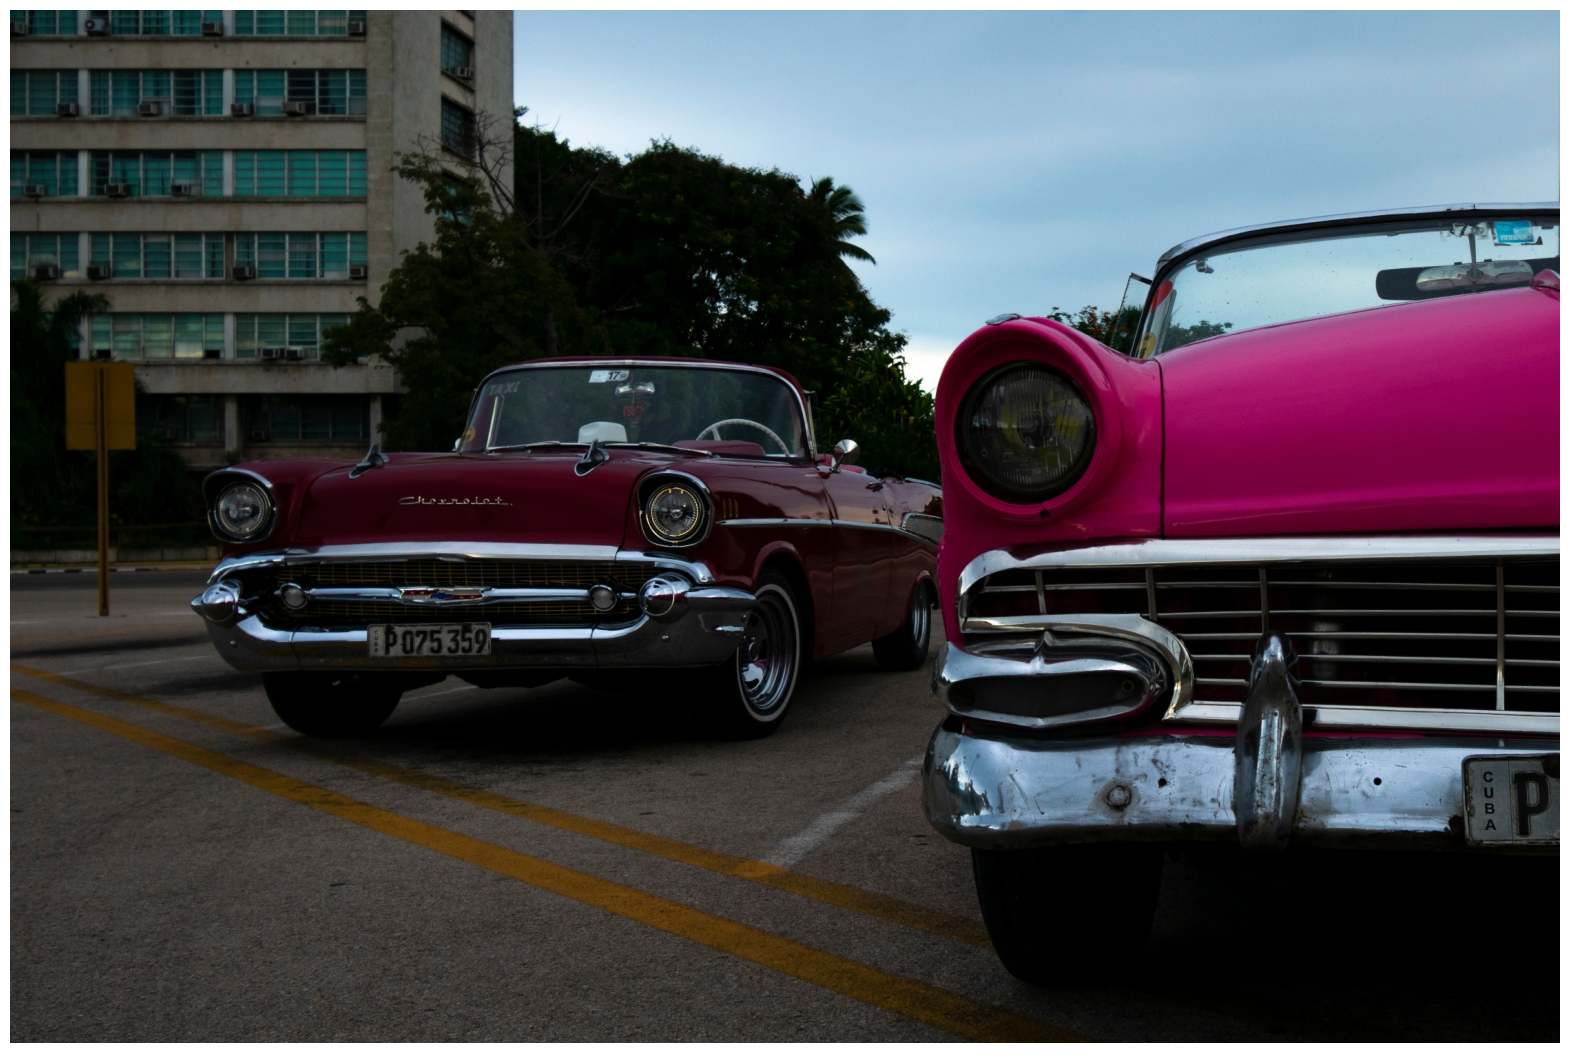

In [5]:
plt.figure(figsize=(20, 20))
plt.imshow(image)
plt.axis('off')
plt.show()

## Mask from automatic mask generation

To run automatic mask generation, provide a version of SAM 2 to the `SAM2AutomaticMaskGenerator` class. Set the path below to the SAM 2 checkpoint.

Mask generation returns a list over masks, where each mask is a dictionary containing various data about the mask. These keys are:
* `segmentation` : the mask
* `area` : the area of the mask in pixels
* `bbox` : the boundary box of the mask in XYWH format
* `predicted_iou` : the model's own prediction for the quality of the mask
* `point_coords` : the sampled input point that generated this mask
* `stability_score` : an additional measure of mask quality
* `crop_box` : the crop of the image used to generate this mask in XYWH format

In [6]:
# np.save('mask_sample.npy', masks)
masks = np.load('assets/mask_sample.npy', allow_pickle=True)

In [7]:
print(masks.dtype)
print(len(masks))
print(masks[0].keys())

object
55
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


In [8]:
print(masks[0]['segmentation'].shape)
print(masks[0]['segmentation'])

(1500, 2250)
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


Show all the masks overlayed on the image.

In [10]:
height, width = 1080, 1920
dummy_mask = {
    'segmentation': np.zeros((height, width), dtype=bool)
}
# 打印验证
print(dummy_mask['segmentation'].shape)
print(dummy_mask['segmentation'])

(1080, 1920)
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


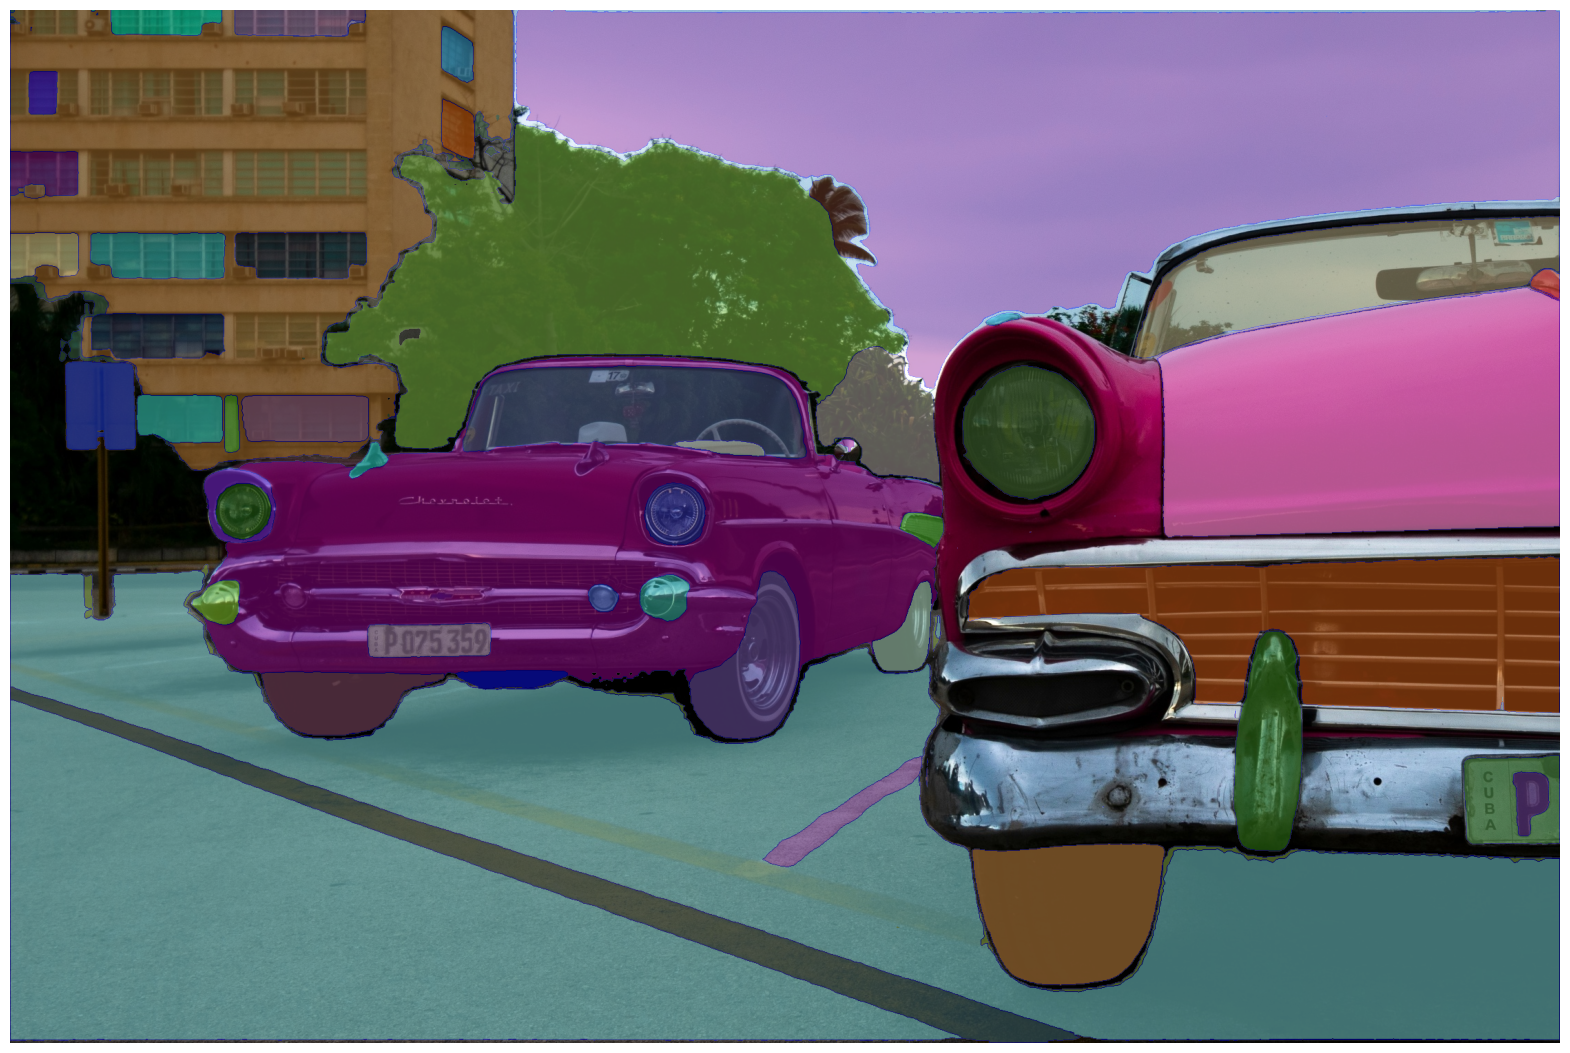

In [9]:
plt.figure(figsize=(20, 20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show()